In [ ]:
pip install -U ckiptagger[tf,gdown]

In [12]:
from ckiptagger import data_utils, construct_dictionary, WS

In [13]:
data_utils.download_data_url("./")

In [14]:
# 因為本機版本不合適，故在colab上做斷詞，並將斷詞結果存入data\dataset1.token.json
ws = WS("./data")

AttributeError: `LSTMCell` is not available with Keras 3.

In [17]:
# 取得資料集的遊戲簡介
from google.colab import drive
import json

drive.mount('/content/drive')
file_path = '/content/drive/My Drive/gameContent.json'
with open(file_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

sentence = []
for entry in data:
  sentence.append([entry['description']])

print(len(sentence))

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
# ckip斷詞
word_sentence_list = []
for i in sentence:
  word_sentence = ws(i)
  word_sentence_list.append(word_sentence)
print(word_sentence_list)
print(len(word_sentence_list))
print(len(word_sentence_list[0]))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [18]:
# 將斷詞結果存入data\dataset1_token.json
file_path = "dataset1_token.json"
with open(file_path, "w", encoding="utf-8") as json_file:
    json.dump(word_sentence_list, json_file, ensure_ascii=False, indent=4)

NameError: name 'word_sentence_list' is not defined

In [1]:
# 從這裡開始
import json

with open("data/dataset1_token.json", "r", encoding="utf-8") as f:
    data = json.load(f)

description_token_list = []
for token_list in data:
    description_token_list.append(token_list[0]) #[[token1, token2...], [token51, token52]...]]

print(len(description_token_list))  # 2706個遊戲
print(description_token_list[0])

2706
['【', '加入', '我們', '！', '參與', '更多', '活動', '】', '\r\n', '官方', '臉書', '：@wdxzcyd\r\n', '官方', 'line', '群組', '：https://reurl.', 'cc/6', 'ZLXOk\r\n\r\n', '【', '遊戲', '簡介', '】', '\r\n', '怎麼', '突然', '回到', '了', '高中', '時代', '？', '！', '什麼', '？', '這', '次', '我', '竟然', '不', '是', '學生', '，', '成為', '了', '一', '所', '高中', '的', '校長', '，', '要', '運營', '整', '個', '校園', '，', '管理', '學生', '和', '老師', '！', '\r\n', '這', '一瞬間', '，', '你', '是', '想', '用心', '經營', '你', '的', '校園', '，', '成為', '一', '所', '名校', '校長', '，', '倍享', '榮譽', '；', '還是', '想', '整', '蠱', '學生', '，', '給', '他們', '塞滿', '課程', '和', '家庭', '作業', '？', '開啟', '成為', '校長', '的', '旅程', '，', '一切', '都', '聽', '你', '安排', '啦', '！', '\r\n\r\n', '【', '遊戲', '特色', '】', '\r\n**', '建設', '校園', ' ', '模擬', '課堂', '**\r\n', '各', '種', '校園', '設施', '任', '你', '佈局', '；', '課堂', '桌椅', '板凳', '、', '空調', '電視', '、', '音響', '、', '超大', '書櫃', '、', '鮮花', '雕塑', '等', '…', '…', '超豪華', '多媒體', '教室', '，', '模擬', '設計', '，', '感受', '最', '贊', '的', '校園', '設施', '體驗', '！', '\r\n', '還', '有', '僱用', '各位', '名師', '輔導

In [2]:
# word embedding
from transformers import BertTokenizer, BertModel
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')
model = BertModel.from_pretrained('bert-base-chinese')

embeddings = []
for token_list in description_token_list:
  input_ids = tokenizer.convert_tokens_to_ids(token_list)
  input_ids = input_ids[:512]     # BERT最長限制512，所以後面的刪除
  input_ids = torch.tensor([input_ids])
  with torch.no_grad():
    outputs = model(input_ids)
    token_embeddings = outputs.last_hidden_state.squeeze(0).numpy()
  
  # document embedding
  description_embedding = token_embeddings.mean(axis=0)
  embeddings.append(description_embedding)


print(len(embeddings))    # 2706個遊戲
print(len(embeddings[0])) # 768維度
print(embeddings[0])

c:\Users\ntou-nlp\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\ntou-nlp\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


2706
768
[-3.15719694e-01 -3.55459511e-01 -8.17646980e-01  4.17300686e-02
  7.46115029e-01  1.50808886e-01 -7.72305205e-02  1.01604176e+00
 -1.62107503e+00 -4.20574486e-01 -2.16014639e-01 -7.26494491e-01
 -7.75520325e-01  8.93042460e-02 -1.03338373e+00 -1.19312131e+00
 -6.59837574e-02  3.17641586e-01 -6.62520230e-01  4.27324563e-01
 -1.13589859e+00 -6.15732074e-02  2.62494385e-01  2.48025522e-01
  5.60358822e-01  9.35450673e-01 -1.67510629e-01  1.72741055e-01
 -2.54951026e-02  6.69787765e-01 -4.19467203e-02  2.59937614e-01
  1.02872002e+00  2.64635950e-01  9.18218076e-01 -1.55257285e-01
 -3.67897868e-01  7.15616584e-01  3.40210140e-01  5.86507320e-01
 -8.96218300e-01 -1.11796021e+00 -3.00384581e-01  5.98452270e-01
  2.38618195e-01  5.86310327e-01  3.90415490e-02 -9.33803618e-01
 -6.47913635e-01  1.34427384e-01  5.98157763e-01  9.15828705e+00
  3.45772892e-01 -4.58368450e-01 -6.11473083e-01 -6.44098818e-01
 -4.69188064e-01  5.06399805e-03  1.10537171e-01 -1.16713807e-01
 -3.58101279e-01

'embeddings_list = []\nembed_url = "https://tfhub.dev/google/nnlm-zh-dim128/2"\nhub_layer = hub.KerasLayer(embed_url, input_shape=[], dtype=tf.string, trainable=True)\n\nfor entry in word_sentence_list:\n  for i in entry:\n    embeddings = hub_layer(i)\n    #print(embeddings.shape)         # 假設該遊戲簡介有n個token，則為tensor(n, 128)\n    embeddings_list.append(embeddings)\n\nmerged_tensor = tf.concat(embeddings_list, axis=0)\nprint(merged_tensor.shape)            # 假設所有遊戲簡介共有k=n1+n2+...個token，則為tensor(k, 128)\ntoken_list = merged_tensor.numpy().tolist()   # k * tensor(1, 128)'

In [47]:
# 以遊戲簡介為單位分群，並顯示結果
"""from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=17, random_state=0)
clusters = kmeans.fit_predict(embeddings)"""

"""from sklearn.cluster import SpectralClustering
spectral = SpectralClustering(n_clusters=17, affinity='nearest_neighbors', random_state=0)
clusters = spectral.fit_predict(embeddings)"""

"""from sklearn.cluster import AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=17)
clusters = agg_clustering.fit_predict(embeddings)"""

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=17, random_state=0)
clusters = gmm.fit_predict(embeddings)

# 查看分群結果
print(clusters)
print(len(clusters))


[ 3  8  2 ... 16 11  9]
2706


In [49]:
import json

with open('content\gameContent.json', 'r', encoding='utf-8') as f:
  data = json.load(f)

#print(data[2]['title'])
#print(data[2]['genre'])

cnt=0
for i in range(len(clusters)):
  if clusters[i] == 15:
    cluster_1_games = data[i]['title']
    cluster_1_genre = data[i]['genre']
    print(cluster_1_games, cluster_1_genre)
    cnt+=1

print(cnt)



捕魚大世界 - 捕魚達人2 休閒
大福Online-柏青斯洛、推幣機、捕魚、麻將、拉霸娛樂城 博奕
大俠你超勇 冒險
鬥神訣-開服送「天后媽祖」 角色扮演
寶島娛樂城－小鋼珠 柏青哥 全台唯一 博奕
萬妖領域 角色扮演
逍遙祖師 角色扮演
豪神娛樂城-麻將、捕魚、賓果、水果盤、骰寶、拉霸機、老虎機 博奕
皇家水果盤 博奕
德州撲克達人 博奕
小妖問道 角色扮演
聚寶Online - 安心亞代言推薦 博奕
歡囍麻將 - 台灣麻將、香港麻雀、大佬2、13支、SLOT 博奕
三國戰紀 - 經典街機無雙競技 街機
Claw Eden - 真實的娃娃機 街機
咻咻三國 冒險
天天愛捕魚-街機黃金捕魚場-經典捕魚機，助您一路發 街機
愛台灣行運大老二 (單機+連線) 益智
這個三國輸不起－送10,000抽！ 休閒
鑽石水果盤 博奕
麻將無雙-血流麻將、老虎機、捕魚機、妞妞、德州撲克、娛樂城 博奕
麻將 神來也麻將－台灣16張、麻雀 博奕
看圖猜成語 拼字
吞吞龍大冒險 休閒
台灣麻將單機版-精美3d棋牌麻將 博奕
Muse Dash 音樂
金有錢娛樂城-麻將、老虎機、柏青斯洛、刮刮樂、賓果博弈遊戲 博奕
英雄你好狗-送999抽 紙牌
金好運娛樂城－專為遊藝場玩家訂製 博奕
魚丸娛樂城 - 全民休閒捕魚大作戰 博奕
大旺發娛樂城 博奕
放置傳奇-Idle RPG 拼字
搓麻將 拉霸、水果盤、真人美女麻將、賽馬、刮刮樂 博奕
鑽很大-捕魚、拉霸、娛樂城、百家樂、撲克牌、賓果、麻將、輪盤 博奕
銀豹娛樂城 - 江宏恩 張家瑋聯合推薦老虎機、捕魚機 博奕
嚦咕麻將—超八、賽馬、7PK、老虎機、各式娛樂城遊戲 博奕
神來也撲克 - 大老二、接龍、鬥地主、十三支、鋤大D 紙牌
木塊數讀-九宮格拼圖遊戲 棋類遊戲
鬥地主 神來也斗地主 紙牌
馬場風雲 5G 街機
錢多多娛樂城－拉霸機、老虎機、柏青斯洛、捕魚機、21點、賽馬 博奕
麻將、柏青斯洛-野蠻世界娛樂城-HUGA大亨-羅時豐手癢就來 博奕
麻將 明星3缺1麻將–捕魚機、大老二、老虎機、各式娛樂城遊戲 博奕
富豪捕魚: 經典街機爆金捕魚場,變捕魚達人,一路發發發 街機
滿貫大亨 - 柏青哥、老虎機、捕魚、線上娛樂城 博奕
三國志Kingdom 策略
Ball Slider 3D 街機
多樂米麻將館 - 麻將、大老二、德州撲克、老虎機、娛

<>:3: SyntaxWarning: invalid escape sequence '\g'
<>:3: SyntaxWarning: invalid escape sequence '\g'
C:\Users\ntou-nlp\AppData\Local\Temp\ipykernel_11488\254413200.py:3: SyntaxWarning: invalid escape sequence '\g'
  with open('content\gameContent.json', 'r', encoding='utf-8') as f:


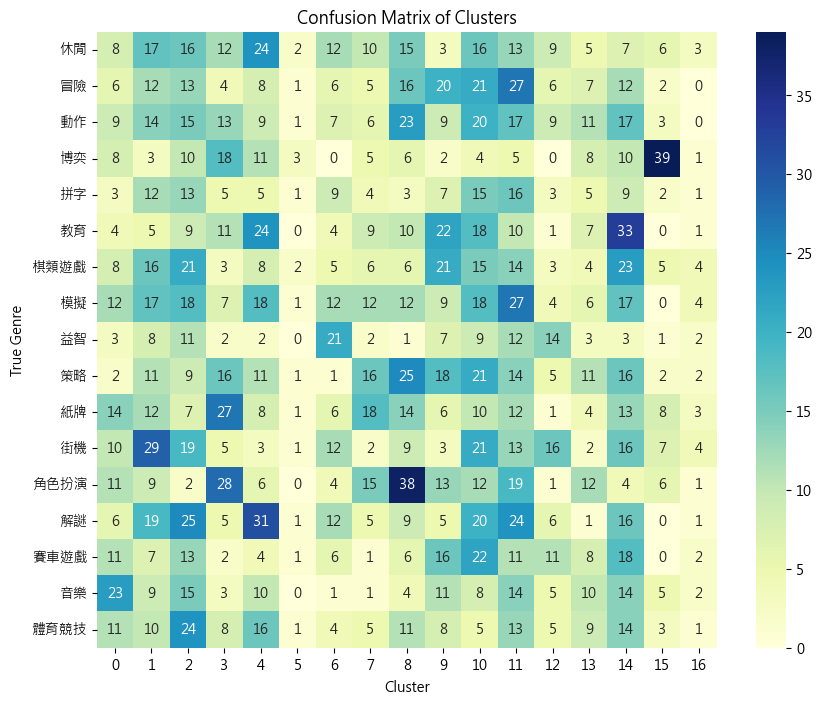

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False

true_labels = [item.get('genre', i % 17) for i, item in enumerate(data)]
conf_matrix = pd.crosstab(pd.Series(true_labels, name='True Genre'), pd.Series(clusters, name='Cluster'))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix of Clusters")

plt.savefig("fun1.jpg")
plt.show()